In [1]:
# make sure you ran workspace\ibm-qiskit-login.py first


print("let's try qiskit")
#https://quantumcomputinguk.org/tutorials/implementing-qram-in-qiskit-with-code

let's try qiskit


In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit

q = QuantumRegister(12, 'q')
c = ClassicalRegister(1, 'c')

#circuit = QuantumCircuit(12)
circuit = QuantumCircuit(q,c)

In [4]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX", "XX", "XX", "XX", "XX", "XX", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)

In [6]:
### Routing nodes ####
circuit.cx(q[0],q[2])
circuit.x(q[3])
circuit.cx(q[2],q[3])

circuit.ccx(q[1],q[2],q[4])
circuit.cx(q[4],q[2])

circuit.ccx(q[1],q[3],q[5])
circuit.cx(q[5],q[3])

circuit.x(q[11]) #Write mode (read mode if commented)

In [7]:
### Writing to memory cell ###
circuit.ccx(q[11],q[4],q[9])
circuit.ccx(q[11],q[5],q[8])
circuit.ccx(q[11],q[2],q[7])
circuit.ccx(q[11],q[3],q[6])

circuit.barrier(q)

In [8]:
### Reading memory cell ###
circuit.ccx(q[4],q[9],q[10])
circuit.ccx(q[5],q[8],q[10])
circuit.ccx(q[2],q[7],q[10])
circuit.ccx(q[3],q[6],q[10])

circuit.barrier(q)
circuit.measure(q[10],c[0]) # Measuring readout qubit 

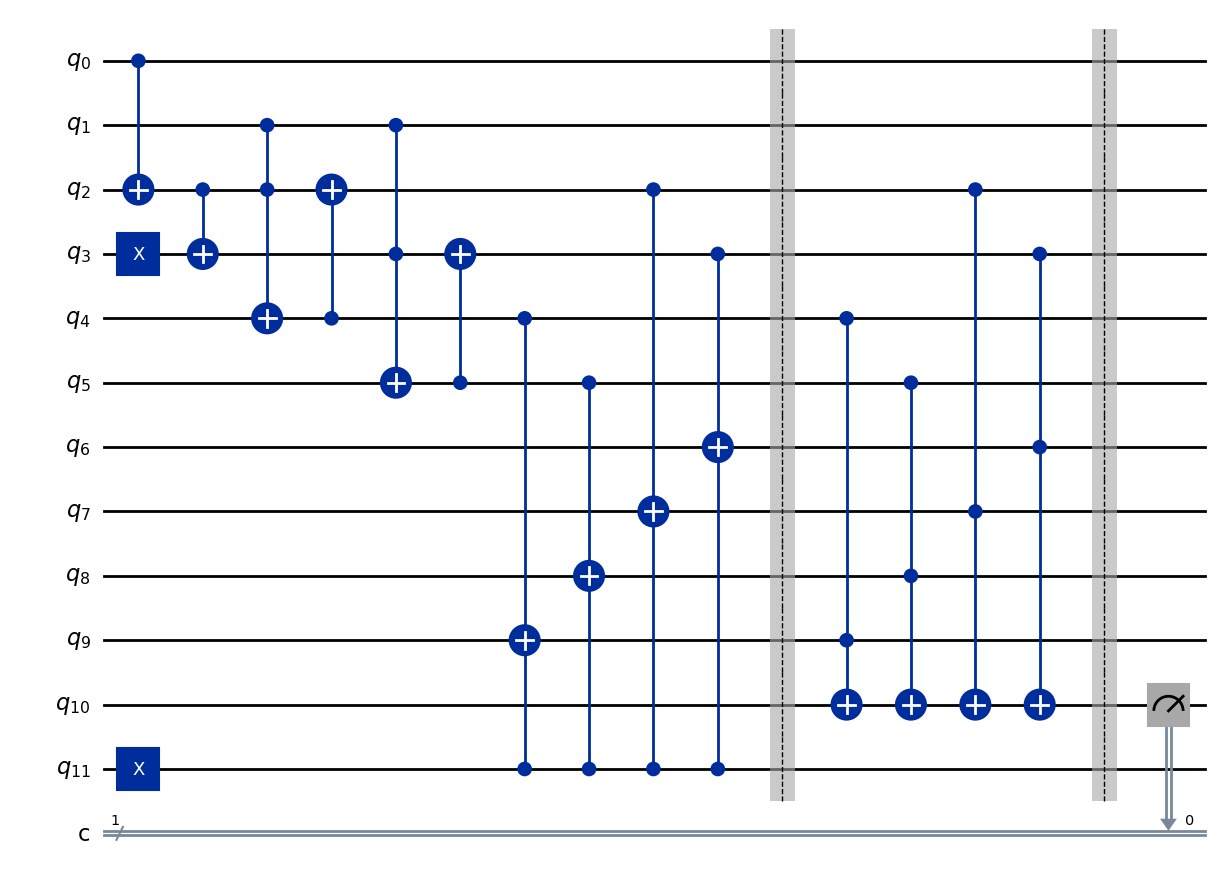

In [9]:
circuit.draw(output='mpl', filename='QRAM.png')

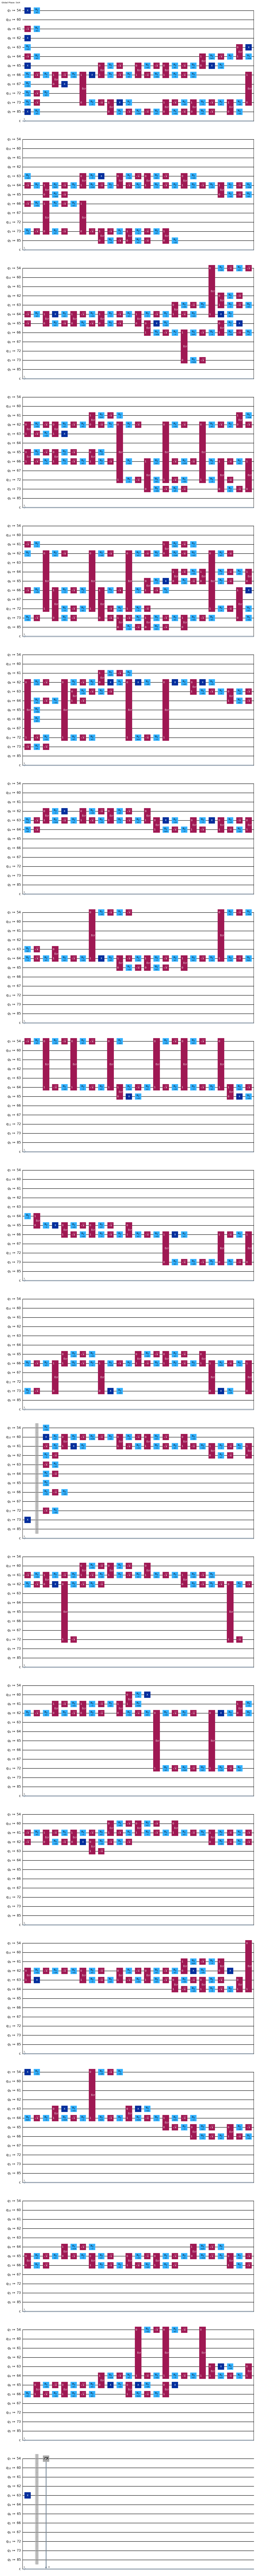

In [10]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
 
isa_circuit.draw('mpl', idle_wires=False)

In [11]:
#job = execute(circuit, backend, shots=100)
#job_monitor(job)

In [12]:
print(isa_circuit.layout)

TranspileLayout(initial_layout=Layout({
66: Qubit(QuantumRegister(12, 'q'), 2),
73: Qubit(QuantumRegister(12, 'q'), 3),
65: Qubit(QuantumRegister(12, 'q'), 6),
67: Qubit(QuantumRegister(12, 'q'), 0),
64: Qubit(QuantumRegister(12, 'q'), 4),
85: Qubit(QuantumRegister(12, 'q'), 5),
63: Qubit(QuantumRegister(12, 'q'), 1),
54: Qubit(QuantumRegister(12, 'q'), 7),
62: Qubit(QuantumRegister(12, 'q'), 8),
61: Qubit(QuantumRegister(12, 'q'), 9),
72: Qubit(QuantumRegister(12, 'q'), 11),
60: Qubit(QuantumRegister(12, 'q'), 10),
0: Qubit(QuantumRegister(115, 'ancilla'), 0),
1: Qubit(QuantumRegister(115, 'ancilla'), 1),
2: Qubit(QuantumRegister(115, 'ancilla'), 2),
3: Qubit(QuantumRegister(115, 'ancilla'), 3),
4: Qubit(QuantumRegister(115, 'ancilla'), 4),
5: Qubit(QuantumRegister(115, 'ancilla'), 5),
6: Qubit(QuantumRegister(115, 'ancilla'), 6),
7: Qubit(QuantumRegister(115, 'ancilla'), 7),
8: Qubit(QuantumRegister(115, 'ancilla'), 8),
9: Qubit(QuantumRegister(115, 'ancilla'), 9),
10: Qubit(QuantumR

In [13]:
print(observables)

[SparsePauliOp(['IZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['IX'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZI'],
              coeffs=[1.+0.j]), SparsePauliOp(['XI'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j])]


In [14]:
# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
estimator = Estimator(backend=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 100
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 


QiskitError: 'Number of qargs does not match (12 != 2)'

In [35]:
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

NameError: name 'mapped_observables' is not defined

In [ ]:
#counts = job.result().get_counts()
#
#print(circuit)
#print(counts)

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [ ]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()